In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Sound_Engineer.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Sound-Engineer.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Upwork-Sound-Engineer.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3405/3137737941.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


In [3]:
merge

,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration
0,Voice Over Needed Male/Female Remote,Looking to hire a Voice Over in our Organizati...,None,"Voice-Over', 'US English Dialect', 'Voice Acti...",None,Hourly: $21.00-$50.00,Entry level,"More than 6 months, Less than 30 hrs/week"
1,Engineer required to help build a Ultrawide ba...,Need help making a product come to life from i...,None,"Electrical Engineering', 'Electronics', 'Elect...",None,Hourly,Intermediate,"1 to 3 months, Less than 30 hrs/week"
2,Commercial Videographer for 1 Day Shoot in Mil...,"Hi,We are looking for a quote for a 1 day vide...",None,"Videography', 'Camera","\n $1,000\n",Fixed-price,Intermediate,None
3,Electronic Engineer Required to Extract Audio ...,I am looking for someone to help me reverse en...,None,"Electrical Engineering', 'Reverse Engineering",\n $247\n,Fixed-price,Expert,None
4,Audio engineer needed 7 song album different ...,Hello engineersI do not know my genre and...,None,"Sound Mixing', 'Mastering', 'Audio Engineering...",\n $450\n,Fixed-price,Intermediate,None
...,...,...,...,...,...,...,...,...
235,"Audio engineer needed to edit, optimize & ensu...","We are a 100,000 art community providing onlin...",None,"Internet of Things Solutions Design', 'Interne...",None,Hourly: $20.00-$45.00,Expert,"1 to 3 months, Less than 30 hrs/week"
236,Experienced Audio Engineer Needed ASAP!!!,I love to keep the listener on the edge of the...,None,"Internet of Things Solutions Design', 'Interne...",None,Hourly: $24.00-$63.00,Expert,"3 to 6 months, 30+ hrs/week"
237,Hardware and firmware engineer needed for exci...,We are looking for an engineer to reverse engi...,None,"Internet of Things Solutions Design', 'Interne...","\n $1,699\n",Fixed-price,Intermediate,None
238,Seeking for a Unity Developer #VR #music-making,"We are a small research team, working within a...",None,"Internet of Things Solutions Design', 'Interne...","\n $60,000\n",Fixed-price,Expert,None


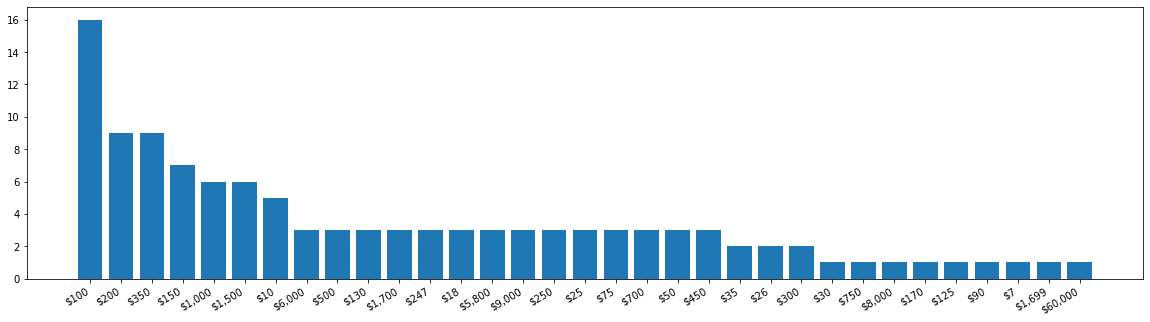

In [4]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()

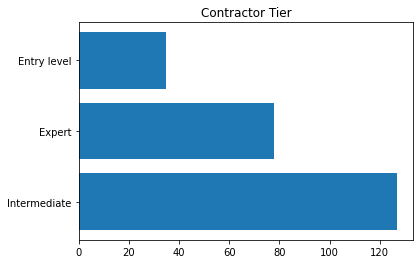

In [5]:
count_ct = merge["Contractor Tier"].value_counts()
plt.barh(count_ct.index, count_ct.values)
plt.title("Contractor Tier")
plt.show()

In [6]:
merge['Skill'] = merge["Skill"].str.replace("'","")
merge['Skill'] = merge["Skill"].str.split(",")

In [7]:
skill_append = []
for skill in range(len(merge['Skill'])):
    skill = merge['Skill'][skill]
    for j in range(len(skill)):
        skill_append.append(str(skill[j]).strip())

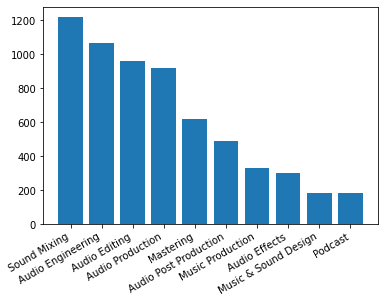

In [8]:
skill_frame = pd.DataFrame(skill_append,columns=["Skill"])
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.bar(count_skill.index, count_skill.values)
plt.xticks(rotation="30",ha="right")
plt.show()

In [9]:
count_skill

Sound Mixing             1220
Audio Engineering        1067
Audio Editing             960
Audio Production          919
Mastering                 619
Audio Post Production     490
Music Production          332
Audio Effects             300
Music & Sound Design      185
Podcast                   183
Name: Skill, dtype: int64

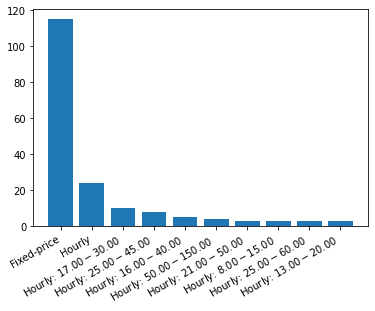

In [10]:
job_type = merge["Job Type"].value_counts()[0:10]
plt.bar(job_type.index, job_type.values)
plt.xticks(rotation="30",ha="right")
plt.show()

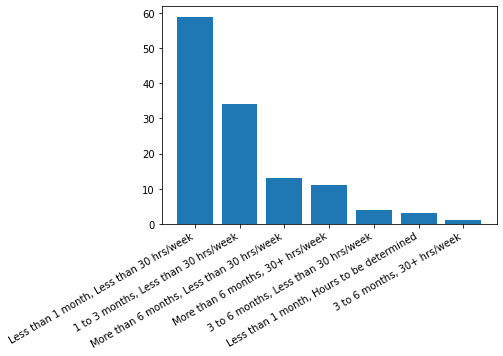

In [11]:
filt = (merge["Duration"] != "None")
filter_duration = merge.loc[filt,"Duration"]
count_duration = filter_duration.value_counts()
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()


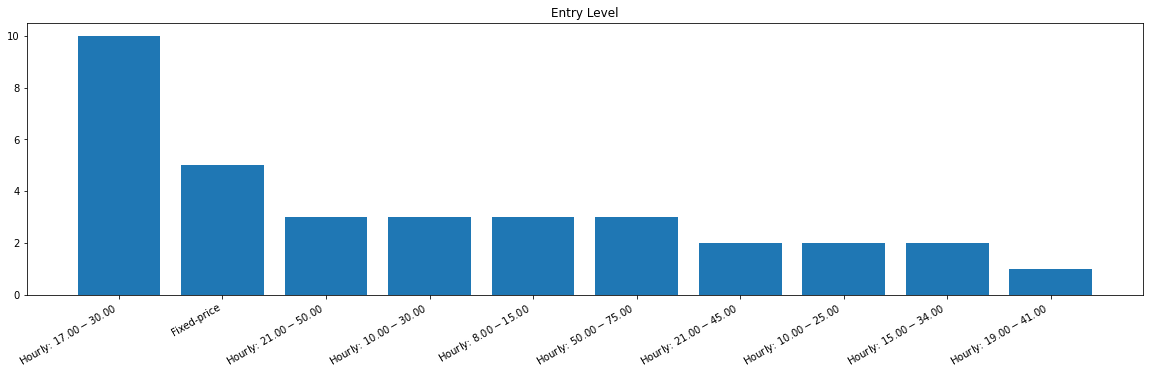

In [12]:
filt = (merge["Contractor Tier"] == "Entry level")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


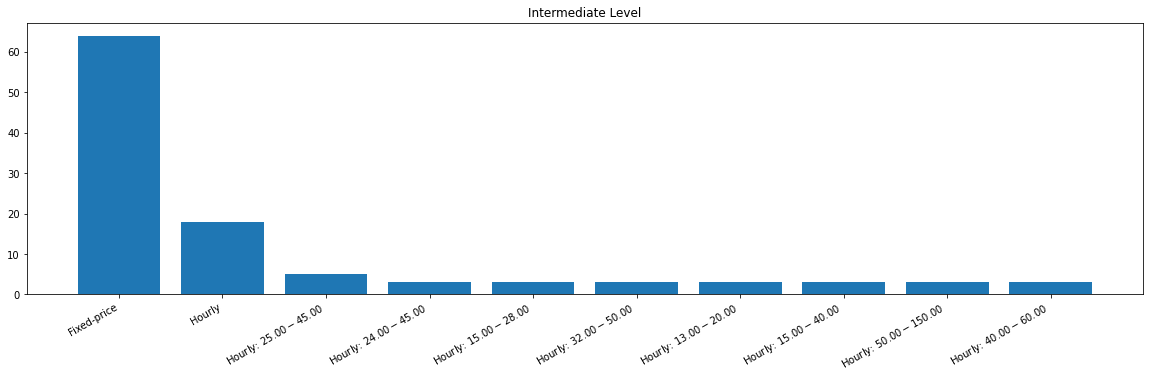

In [13]:
filt = (merge["Contractor Tier"] == "Intermediate")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

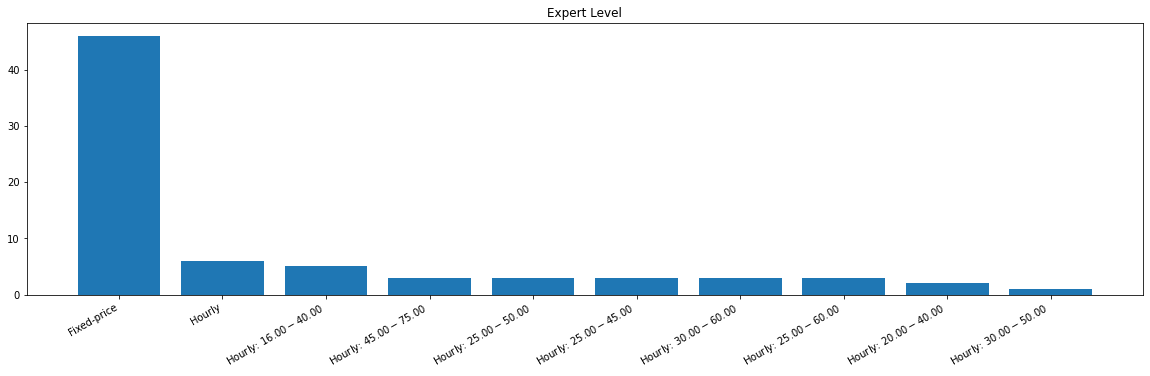

In [14]:
filt = (merge["Contractor Tier"] == "Expert")
count_entry_level = merge.loc[filt,"Job Type"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()